In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
dataset = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/supplement.csv')

In [33]:
dataset.shape

(188340, 10)

In [34]:
dataset.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


I think 'ID' and 'Date' column are not important for my problem because I've Store_id, Region_id and many more id's so I won't prefer column 'ID' over these mentioned columns and 'Date' Column also doesn't matter because we've column which says weather it was holiday or not on the shopping day.
I've considered the store_id because there might be the case that there are 2 stores with same region_code and same location_type so in order to distinguish between then I've kept the 'store_id' column

In [36]:
columns_to_be_dropped = {'ID','Date'}

In [37]:
dataset = dataset.drop(columns_to_be_dropped, axis=1)

In [38]:
dataset.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales
0,1,S1,L3,R1,1,Yes,9,7011.84
1,253,S4,L2,R1,1,Yes,60,51789.12
2,252,S3,L2,R1,1,Yes,42,36868.20
3,251,S2,L3,R1,1,Yes,23,19715.16
4,250,S2,L3,R4,1,Yes,62,45614.52


In [39]:
x = dataset.drop('#Order', axis=1)
y = dataset['#Order']

In [40]:
x

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,1,S1,L3,R1,1,Yes,7011.84
1,253,S4,L2,R1,1,Yes,51789.12
2,252,S3,L2,R1,1,Yes,36868.20
3,251,S2,L3,R1,1,Yes,19715.16
4,250,S2,L3,R4,1,Yes,45614.52
...,...,...,...,...,...,...,...
188335,149,S2,L3,R2,1,Yes,37272.00
188336,153,S4,L2,R1,1,No,54572.64
188337,154,S1,L3,R2,1,No,31624.56
188338,155,S3,L1,R2,1,Yes,49162.41


In [41]:
a = dataset['Store_id'].nunique()
print(f"Dataset have data of {a} Stores")
b = dataset['Store_Type'].nunique()
print(f"There are {b} distinct store_types")
c = dataset['Location_Type'].nunique()
print(f"There are {c} distinct Location_types of Stores")
d = dataset['Region_Code'].nunique()
print(f"There are {d} Regions in dataset")

Dataset have data of 365 Stores
There are 4 distinct store_types
There are 5 distinct Location_types of Stores
There are 4 Regions in dataset


In [42]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
x['Discount']=label_enc.fit_transform(x['Discount'])

In [43]:
x

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,1,S1,L3,R1,1,1,7011.84
1,253,S4,L2,R1,1,1,51789.12
2,252,S3,L2,R1,1,1,36868.20
3,251,S2,L3,R1,1,1,19715.16
4,250,S2,L3,R4,1,1,45614.52
...,...,...,...,...,...,...,...
188335,149,S2,L3,R2,1,1,37272.00
188336,153,S4,L2,R1,1,0,54572.64
188337,154,S1,L3,R2,1,0,31624.56
188338,155,S3,L1,R2,1,1,49162.41


Now I've to encode Store_type, Location_type, Region_code In all these columns are not Ordinal as per my understanding so I'll perform nomial encoding and I wont perform OneHot or frequency encoding because OneHot will increase the dimensions and as frequency of each class in every column in more so calculation time will be increased So I'll simply perform normal mapping

In [44]:
dataset['Store_Type'].unique()

array(['S1', 'S4', 'S3', 'S2'], dtype=object)

In [45]:
mapping_store_type = {'S1':1,'S2':2,'S3':3,'S4':4}

In [46]:
dataset['Location_Type'].unique()

array(['L3', 'L2', 'L1', 'L5', 'L4'], dtype=object)

In [47]:
mapping_location_type = {'L1':1,'L2':2,'L3':3,'L4':4,'L5':5}

In [48]:
dataset['Region_Code'].unique()

array(['R1', 'R4', 'R2', 'R3'], dtype=object)

In [49]:
mapping_region_code = {'R1':1,'R2':2,'R3':3,'R4':4}

In [50]:
x['Store_Type']=x['Store_Type'].map(mapping_store_type)
x['Location_Type']=x['Location_Type'].map(mapping_location_type)
x['Region_Code']=x['Region_Code'].map(mapping_region_code)

In [51]:
x

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,1,1,3,1,1,1,7011.84
1,253,4,2,1,1,1,51789.12
2,252,3,2,1,1,1,36868.20
3,251,2,3,1,1,1,19715.16
4,250,2,3,4,1,1,45614.52
...,...,...,...,...,...,...,...
188335,149,2,3,2,1,1,37272.00
188336,153,4,2,1,1,0,54572.64
188337,154,1,3,2,1,0,31624.56
188338,155,3,1,2,1,1,49162.41


In [52]:
x.isnull().sum()

Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Holiday          0
Discount         0
Sales            0
dtype: int64

Lets check Outliers

<AxesSubplot: >

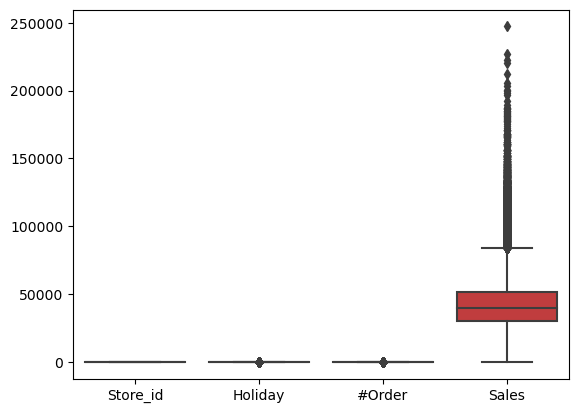

In [53]:
import seaborn as sns
sns.boxplot(dataset)

Also Add RandomForestRegressor in models list If you've a high specified cpu system in my software it is taking time so I've not added it

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
models = [LinearRegression(),DecisionTreeRegressor()]

In [55]:
from sklearn.model_selection import cross_val_score
for model in models:
    cv_score = cross_val_score(model,x,y,cv=10)
    cv_ = sum(cv_score)/10
    print(f"{model} has accuracy score {cv_}")

LinearRegression() has accuracy score 0.9131853668727171
DecisionTreeRegressor() has accuracy score 0.9244336550898764


I'll keep test size little bit bigger because dataset is to large 

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [57]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [58]:
y_pred = regressor.predict(x_test)

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9278712409521829